# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('cars_hw.csv')

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


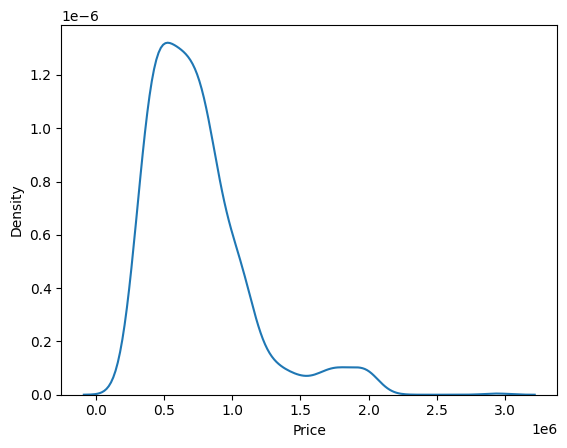

               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

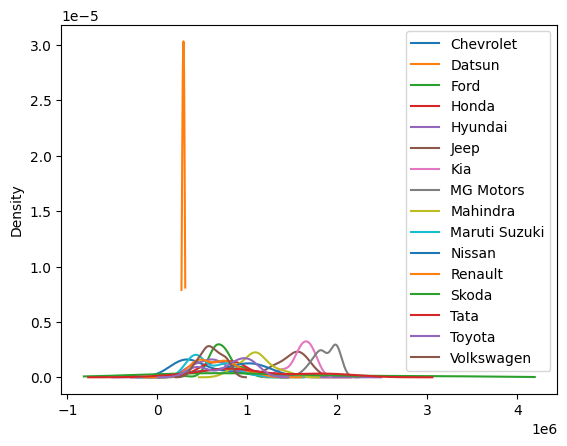

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of Price
print(df['Price'].describe())

# Kernel density plot for Price
sns.kdeplot(df['Price'])
plt.show()

# Grouped summary and kernel density plot by Make
grouped = df.groupby('Make')['Price']
print(grouped.describe())

# Grouped kernel density plot
grouped.plot(kind='kde', legend=True)
plt.show()

Chevrolet cars are the most expensive.

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Prepare data for Model 1 (numerical variables only)
num_vars = df.select_dtypes(include=[np.number]).columns.drop('Price')
X_train_num = train_set[num_vars]
y_train = train_set['Price']
X_test_num = test_set[num_vars]
y_test = test_set['Price']

# Model 1: Linear regression with numerical variables
model_num = LinearRegression()
model_num.fit(X_train_num, y_train)
y_pred_num = model_num.predict(X_test_num)
print('Model 1 R^2:', r2_score(y_test, y_pred_num))
print('Model 1 RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_num)))

# Prepare data for Model 2 (categorical variables only)
cat_vars = df.select_dtypes(include=[object]).columns
full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_vars),
])

X_train_cat = full_pipeline.fit_transform(train_set)
X_test_cat = full_pipeline.transform(test_set)

# Model 2: Linear regression with categorical variables
model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
y_pred_cat = model_cat.predict(X_test_cat)
print('Model 2 R^2:', r2_score(y_test, y_pred_cat))
print('Model 2 RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_cat)))

# Convert the sparse matrices to dense arrays if they are not already
X_train_cat_dense = X_train_cat.toarray() if hasattr(X_train_cat, "toarray") else X_train_cat
X_test_cat_dense = X_test_cat.toarray() if hasattr(X_test_cat, "toarray") else X_test_cat

# Now stack the numerical and categorical features
X_train_all = np.hstack((X_train_num, X_train_cat_dense))
X_test_all = np.hstack((X_test_num, X_test_cat_dense))

# Model 3: Linear regression with all variables
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)
print('Model 3 R^2:', r2_score(y_test, y_pred_all))
print('Model 3 RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_all)))

model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)
print('Model 3 R^2:', r2_score(y_test, y_pred_all))
print('Model 3 RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_all)))

Model 1 R^2: 0.2908824591636343
Model 1 RMSE: 285188.67185774696
Model 2 R^2: 0.708684600157335
Model 2 RMSE: 182791.02923696148
Model 3 R^2: 0.8163910583949348
Model 3 RMSE: 145117.59426197782
Model 3 R^2: 0.8163910583949348
Model 3 RMSE: 145117.59426197782


In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial expansion example (you can loop over different degrees)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_num)
X_test_poly = poly.transform(X_test_num)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
print('Polynomial Model R^2:', r2_score(y_test, y_pred_poly))
print('Polynomial Model RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Polynomial Model R^2: 0.32839498863251393
Polynomial Model RMSE: 277542.89918056666


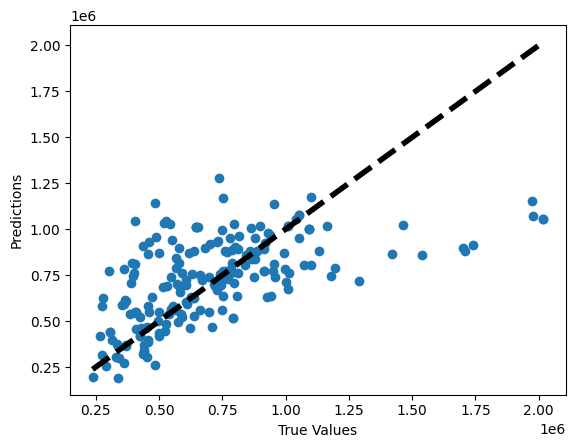

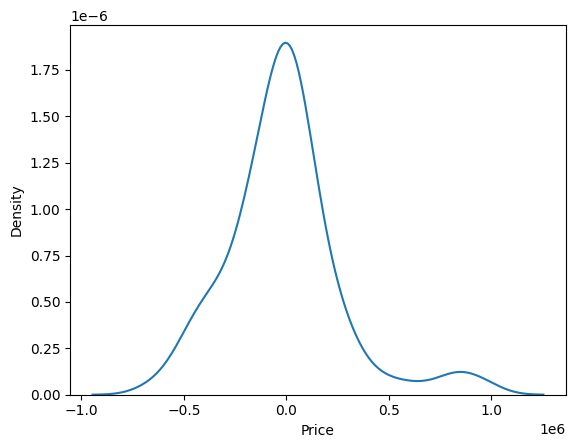

In [8]:
# Plotting predicted vs. true values
plt.scatter(y_test, y_pred_poly)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Kernel density plot of the residuals
sns.kdeplot(y_test - y_pred_poly)
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train_num, y_train)

# Predicting the values
y_pred_tree = tree_model.predict(X_test_num)

# Calculating R^2 and RMSE
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print('Decision Tree R^2:', r2_tree)
print('Decision Tree RMSE:', rmse_tree)

Decision Tree R^2: 0.46493998344724086
Decision Tree RMSE: 247727.6060730025


**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('wages_hw.csv')


# Split the data into training and testing sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_vars = train_set.select_dtypes(include=[object]).columns

# Update ColumnTransformer to one-hot encode all categorical variables
column_trans = ColumnTransformer(
    [('category', OneHotEncoder(), categorical_vars)],
    remainder='passthrough')

X_train = column_trans.fit_transform(train_set)
X_test = column_trans.transform(test_set)

y_train = train_set['avg_salary']
y_test = test_set['avg_salary']

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.9999999999689554
RMSE: 0.00021598608314620107


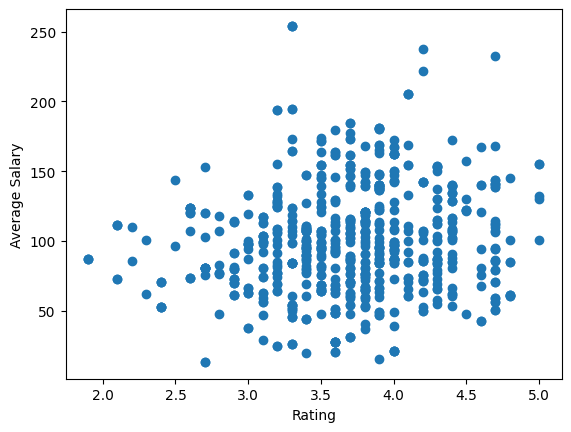

Categorical Rating - R^2: 0.04086684103971272
Categorical Rating - RMSE: 37.96399398503888


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# Scatterplot of avg_salary and Rating
plt.scatter(df['Rating'], df['avg_salary'])
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()

# Linear regression of avg_salary on Rating
model_rating = LinearRegression()
model_rating.fit(train_set[['Rating']], y_train)

# One-hot encode the 'Rating' column separately
encoder = OneHotEncoder(sparse=False)
X_train_rating_encoded = encoder.fit_transform(train_set[['Rating']])
X_test_rating_encoded = encoder.transform(test_set[['Rating']])

# Define numeric variables (excluding the target variable 'avg_salary')
numeric_vars = train_set.select_dtypes(include=[np.number]).columns.drop('avg_salary')

# Extract numeric data from training and test sets
X_train_num = train_set[numeric_vars].to_numpy()
X_test_num = test_set[numeric_vars].to_numpy()


encoder = OneHotEncoder(sparse=False)
X_train_rating_encoded = encoder.fit_transform(train_set[['Rating']])
X_test_rating_encoded = encoder.transform(test_set[['Rating']])

X_train_rating_cat = np.hstack((X_train_rating_encoded, X_train_num))
X_test_rating_cat = np.hstack((X_test_rating_encoded, X_test_num))

# Linear regression with categorical Rating
model_rating_cat = LinearRegression()
model_rating_cat.fit(X_train_rating_cat, y_train)

# Evaluate the model with categorical Rating
y_pred_rating_cat = model_rating_cat.predict(X_test_rating_cat)
print('Categorical Rating - R^2:', r2_score(y_test, y_pred_rating_cat))
print('Categorical Rating - RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rating_cat)))

There is not an obvious relationship between the two variables. Higher ratings do predict higher wages. the categorical Rating model has a higher r^2 and a lower RMSE, it suggests that treating Rating as separate categories captures the relationship with avg_salary more effectively.

In [25]:

sector_encoded_test = encoder_sector.transform(test_set[['Sector']]).toarray()
rating_encoded_test = encoder_rating.transform(test_set[['Rating']]).toarray()


df_sector_test = pd.DataFrame(sector_encoded_test, columns=sector_feature_names)
df_rating_test = pd.DataFrame(rating_encoded_test, columns=rating_feature_names)

interaction_terms_test = pd.DataFrame()

for sector_col in sector_feature_names:
    for rating_col in rating_feature_names:
        interaction_terms_test[f'{sector_col}_{rating_col}'] = df_sector_test[sector_col] * df_rating_test[rating_col]

# Predict and evaluate for the test set
y_test = test_set['avg_salary']
y_pred = model_interaction.predict(interaction_terms_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R^2:', r2)
print('RMSE:', rmse)

# Interpret coefficients
coefficients = pd.Series(model_interaction.coef_, index=interaction_terms.columns)
print(coefficients.sort_values(ascending=False).head())  # Show top sector-rating pairs




<ipython-input-25-cf4593d3d103>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_terms_test[f'{sector_col}_{rating_col}'] = df_sector_test[sector_col] * df_rating_test[rating_col]
<ipython-input-25-cf4593d3d103>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_terms_test[f'{sector_col}_{rating_col}'] = df_sector_test[sector_col] * df_rating_test[rating_col]
<ipython-input-25-cf4593d3d103>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

R^2: -7.028888516877511e+27
RMSE: 3249943199367576.0
Sector_Accounting & Legal_Rating_1.9    4.502279e+16
Sector_-1_Rating_4.8                    3.215117e+16
Sector_-1_Rating_5.0                    3.060120e+16
Sector_Accounting & Legal_Rating_4.3    3.046123e+16
Sector_Accounting & Legal_Rating_2.4    2.951892e+16
dtype: float64


<ipython-input-25-cf4593d3d103>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_terms_test[f'{sector_col}_{rating_col}'] = df_sector_test[sector_col] * df_rating_test[rating_col]
<ipython-input-25-cf4593d3d103>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_terms_test[f'{sector_col}_{rating_col}'] = df_sector_test[sector_col] * df_rating_test[rating_col]
<ipython-input-25-cf4593d3d103>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

Both the r^2 and RMSE are different from part 2. Buisness Services sector have the highest wages.

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np



# Identify categorical and numeric columns
categorical_vars = train_set.select_dtypes(include=[object]).columns
numeric_vars = train_set.select_dtypes(include=[np.number]).columns.drop('avg_salary')

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse=False)
X_train_cat = encoder.fit_transform(train_set[categorical_vars])
X_test_cat = encoder.transform(test_set[categorical_vars])

# Extract numeric data
X_train_num = train_set[numeric_vars].to_numpy()
X_test_num = test_set[numeric_vars].to_numpy()

# Concatenate numeric and encoded categorical features
X_train = np.hstack((X_train_cat, X_train_num))
X_test = np.hstack((X_test_cat, X_test_num))

# Linear regression with all variables
model_all = LinearRegression()
model_all.fit(X_train, train_set['avg_salary'])

# Evaluate the model
y_pred = model_all.predict(X_test)
r2 = r2_score(test_set['avg_salary'], y_pred)
print('R^2 for model with all variables:', r2)



R^2 for model with all variables: 0.26395475988749784


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 is much lower compared to the simpler models. it suggests that the model has limited predictive accuracy or is not very effective in capturing the relationship between the independent and dependent variables.

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np


encoder_sector = OneHotEncoder()
encoder_rating = OneHotEncoder()
sector_encoded_train = encoder_sector.fit_transform(train_set[['Sector']]).toarray()
rating_encoded_train = encoder_rating.fit_transform(train_set[['Rating']]).toarray()
interaction_terms_train = sector_encoded_train[:, :, np.newaxis] * rating_encoded_train[:, np.newaxis, :]


interaction_terms_train = interaction_terms_train.reshape(interaction_terms_train.shape[0], -1)

# Combine with original 'Sector' and 'Rating' data
X_train_tree = np.hstack((sector_encoded_train, rating_encoded_train, interaction_terms_train))

# Fit the decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_tree, train_set['avg_salary'])

# Apply the same encoding and interaction to the test set
sector_encoded_test = encoder_sector.transform(test_set[['Sector']]).toarray()
rating_encoded_test = encoder_rating.transform(test_set[['Rating']]).toarray()

interaction_terms_test = sector_encoded_test[:, :, np.newaxis] * rating_encoded_test[:, np.newaxis, :]
interaction_terms_test = interaction_terms_test.reshape(interaction_terms_test.shape[0], -1)

X_test_tree = np.hstack((sector_encoded_test, rating_encoded_test, interaction_terms_test))

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test_tree)
r2_tree = r2_score(test_set['avg_salary'], y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(test_set['avg_salary'], y_pred_tree))

print('Decision Tree R^2:', r2_tree)
print('Decision Tree RMSE:', rmse_tree)

Decision Tree R^2: 0.16316162192247508
Decision Tree RMSE: 35.46118446174925



Comparing the results from Part 2 (Linear Regression with categorical Rating) and the Decision Tree regression using Sector, Rating, and their interactions:

R² (Coefficient of Determination):

In Part 2 (Linear Regression with categorical Rating), the R² is
0.0409
0.0409, indicating that the model explains about 4.09% of the variance in the avg_salary.
For the Decision Tree model, the R² is
0.1632
0.1632, indicating that about 16.32% of the variance in avg_salary is explained by the model.
The decision tree has a higher R², meaning it better captures the variation in avg_salary compared to the linear regression model in Part 2.

RMSE (Root Mean Square Error):

In Part 2, the RMSE is
37.96
37.96. This value represents the standard deviation of the residuals (prediction errors) in the linear regression model.
For the Decision Tree model, the RMSE is
35.46
35.46.
A lower RMSE value in the decision tree model suggests that the predictions are closer to the actual values, indicating better predictive accuracy compared to the linear regression model in Part 2.

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Identify categorical and numeric columns
categorical_vars = train_set.select_dtypes(include=[object]).columns
numeric_vars = train_set.select_dtypes(include=[np.number]).columns.drop('avg_salary')

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse=False)
X_train_cat = encoder.fit_transform(train_set[categorical_vars])
X_test_cat = encoder.transform(test_set[categorical_vars])

# Extract numeric data
X_train_num = train_set[numeric_vars].to_numpy()
X_test_num = test_set[numeric_vars].to_numpy()

# Concatenate numeric and encoded categorical features
X_train = np.hstack((X_train_cat, X_train_num))
X_test = np.hstack((X_test_cat, X_test_num))

# Fit the decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, train_set['avg_salary'])

# Predict and evaluate
y_pred = tree_model.predict(X_test)
r2 = r2_score(test_set['avg_salary'], y_pred)
rmse = np.sqrt(mean_squared_error(test_set['avg_salary'], y_pred))

print('Decision Tree R^2:', r2)
print('Decision Tree RMSE:', rmse)

Decision Tree R^2: -0.042985101824254635
Decision Tree RMSE: 39.588723227741525


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Let's say we choose 'Sector', 'Rating', and 'Size' as key predictors
selected_vars = ['Sector', 'Rating', 'Size']

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
X_train_selected = encoder.fit_transform(train_set[selected_vars])
X_test_selected = encoder.transform(test_set[selected_vars])

tree_model_custom = DecisionTreeRegressor(max_depth=5)  # Example parameter
tree_model_custom.fit(X_train_selected, train_set['avg_salary'])

# Predict and evaluate
y_pred_custom = tree_model_custom.predict(X_test_selected)
r2_custom = r2_score(test_set['avg_salary'], y_pred_custom)
rmse_custom = np.sqrt(mean_squared_error(test_set['avg_salary'], y_pred_custom))

print('Custom Decision Tree R^2:', r2_custom)
print('Custom Decision Tree RMSE:', rmse_custom)

Custom Decision Tree R^2: 0.19924684458378905
Custom Decision Tree RMSE: 34.68820063511183


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Degrees of Freedom: The degrees of freedom in this model are determined by the number of splits in the decision tree (controlled by max_depth) and the number of categories in the one-hot encoded variables.

Reasons for Performance Differences: The performance of this custom model depends on how well the selected variables and model parameters capture the underlying patterns in the data. If it performs better, it might be due to a more effective selection of variables or a better balance between model complexity and generalizability. If it performs worse, it might be due to missing important predictors, overfitting, or underfitting.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?